In [1]:
!pip install --upgrade openai

import os
import openai

openai.api_key = "######

In [2]:
import pandas as pd

df = pd.read_csv('newsoomin_hi.csv')
df

,prompt,completion
0,If you came from money it was super easy These...,prochoice
1,A clear majority of Americans including most R...,prochoice
2,Should we use the government to force pregnant...,prochoice
3,In a safe abortion no one dies Only antichoice...,prochoice
4,Everything in the America is related to profit...,prochoice
...,...,...
781,How is abortion not enabling misogyny here The...,prolife
782,Amy Gehrke Exec of discusses the need for coh...,prolife
783,yep i mean we all expected it to be by this po...,prolife
784,Waving to our friends and everyone else w...,prolife


In [6]:
df['completion'] = df['completion'].apply(lambda x: str(x).replace('pro', ''))
df['completion'] = df['completion'].apply(lambda x: str(x).lstrip())
df['completion'] = df['completion'].apply(lambda x: '' + str(x))
df

,prompt,completion
0,If you came from money it was super easy These...,choice
1,A clear majority of Americans including most R...,choice
2,Should we use the government to force pregnant...,choice
3,In a safe abortion no one dies Only antichoice...,choice
4,Everything in the America is related to profit...,choice
...,...,...
781,How is abortion not enabling misogyny here The...,life
782,Amy Gehrke Exec of discusses the need for coh...,life
783,yep i mean we all expected it to be by this po...,life
784,Waving to our friends and everyone else w...,life


In [7]:
df.to_json("happyfinal.jsonl", orient='records', lines=True)

In [15]:
!pip install --upgrade openai
!openai tools fine_tunes.prepare_data -f happyfinal.jsonl -q

Analyzing...

- Your file contains 786 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 5 duplicated prompt-completion sets. These are rows: [337, 363, 458, 510, 778]
- All prompts end with suffix `\n\n###\n\n\n\n###\n\n`. This suffix seems very long. Consider replacing with a shorter suffix, such as `\n\n===\n\n`
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more details

Based on the analysis we will perform the following actions:
- [Recommended] Remove 5 duplicate rows [Y/n]: Y
- [Recommended] Add a whitespace charact

In [16]:
!openai --api-key '######' api fine_tunes.create -t "happyfinal_prepared_train (3).jsonl" -v "happyfinal_prepared_valid (3).jsonl" --compute_classification_metrics --classification_positive_class " choice"

Upload progress: 100%|███████████████████████| 187k/187k [00:00<00:00, 120Mit/s]
Uploaded file from happyfinal_prepared_train (3).jsonl: file-my2mdLJSWk5dZVxT5Q2QRwUm
Upload progress: 100%|████████████████████| 46.4k/46.4k [00:00<00:00, 15.2Mit/s]
Uploaded file from happyfinal_prepared_valid (3).jsonl: file-9FiufMR0mBz2wpA9rNY6P5tn
Created fine-tune: ft-t0fIK4KnpUD1BNeu94mHWaXd
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-07-26 11:03:09] Created fine-tune: ft-t0fIK4KnpUD1BNeu94mHWaXd

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-t0fIK4KnpUD1BNeu94mHWaXd



In [60]:
!openai --api-key '#####' api fine_tunes.follow -i ft-t0fIK4KnpUD1BNeu94mHWaXd

[2023-07-26 11:03:09] Created fine-tune: ft-t0fIK4KnpUD1BNeu94mHWaXd
[2023-07-26 13:27:48] Fine-tune costs $0.45
[2023-07-26 13:27:48] Fine-tune enqueued. Queue number: 7
[2023-07-26 13:29:28] Fine-tune is in the queue. Queue number: 6
[2023-07-26 13:29:56] Fine-tune is in the queue. Queue number: 4
[2023-07-26 13:29:56] Fine-tune is in the queue. Queue number: 4
[2023-07-26 13:30:27] Fine-tune is in the queue. Queue number: 3
[2023-07-26 13:30:34] Fine-tune is in the queue. Queue number: 2
[2023-07-26 13:30:39] Fine-tune is in the queue. Queue number: 1
[2023-07-26 13:31:51] Fine-tune is in the queue. Queue number: 0
[2023-07-26 13:32:15] Fine-tune started
[2023-07-26 13:35:25] Completed epoch 1/4
[2023-07-26 13:37:33] Completed epoch 2/4
[2023-07-26 13:39:39] Completed epoch 3/4
[2023-07-26 13:41:46] Completed epoch 4/4
[2023-07-26 13:42:13] Uploaded model: curie:ft-personal-2023-07-26-04-42-12
[2023-07-26 13:42:14] Uploaded result file: file-7MegiFRQJJHLk0fEl1HS9oAS
[2023-07-26 13:4

In [61]:
!openai --api-key '#########' api fine_tunes.results -i ft-t0fIK4KnpUD1BNeu94mHWaXd > result.csv

In [64]:
results = pd.read_csv('result.csv')
results

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/precision,classification/recall,classification/auroc,classification/auprc,classification/f1.0
0,1,57,1,0.469116,0.0,0.0,0.401308,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,146,2,0.255771,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,211,3,0.358240,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,284,4,0.266840,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,341,5,0.291122,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2493,157701,2493,0.018111,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2493,2494,157766,2494,0.021540,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2494,2495,157823,2495,0.024771,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2495,2496,157888,2496,0.027200,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
ft_model = 'curie:ft-personal-2023-07-26-04-42-12'

In [72]:
sample_prolife_tweet = """Roe abortion killing WILL fall as USA public see THEIR healthy babies killed by paid PPhood killers.
WAKE up Irish.  Repealers CONNED u into killing. 
DUMP SF, Labour, Green, ALL Repealers, pro abort TDs, media, celebs.
Support prolife TDs, groups-money votes voice pen publicity."""
res = openai.Completion.create(model=ft_model, prompt=sample_prolife_tweet + '\n\n###\n\n', max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

'\n'

In [67]:
test = pd.read_json('happyfinal_prepared_valid (3).jsonl', lines=True)
test.head()

,prompt,completion
0,A clear majority of Americans including most R...,choice
1,Everything in the America is related to profit...,choice
2,Attacks on abortion amp barriers to care dispr...,choice
3,HB would protect our states healthcare provide...,choice
4,If a person decides they want children \n ...,choice


In [73]:
res = openai.Completion.create(model=ft_model, prompt=test['prompt'][0] + '\n\n###\n\n', max_tokens=1, temperature=0)
res['choices'][0]['text']

' choice'

<AxesSubplot:>

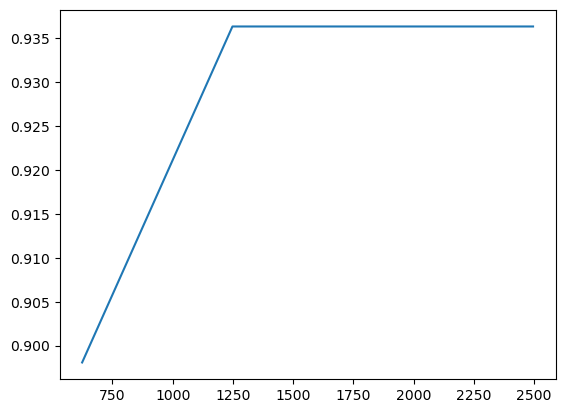

In [74]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()